<a href="https://colab.research.google.com/github/neel26desai/cmpe258_neural_network_advanced/blob/main/Classification_and_Data_Augmentation_for_Images_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display


In [2]:
# prompt: get a small section of MNIST images, using tensorflow

import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
display(train_images[1])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [9]:
train_images.shape

(60000, 28, 28)

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1,)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images,test_labels))


Epoch 1/5
938/938 [==============================] - 6s 4ms/step - loss: 0.7887 - accuracy: 0.9368 - val_loss: 0.1508 - val_accuracy: 0.9646
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0884 - accuracy: 0.9761 - val_loss: 0.1130 - val_accuracy: 0.9728
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0572 - accuracy: 0.9831 - val_loss: 0.1082 - val_accuracy: 0.9727
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0516 - accuracy: 0.9847 - val_loss: 0.1112 - val_accuracy: 0.9750
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0454 - accuracy: 0.9856 - val_loss: 0.1297 - val_accuracy: 0.9695


Trying Data Augmentation

In [19]:
import matplotlib.pyplot as plt

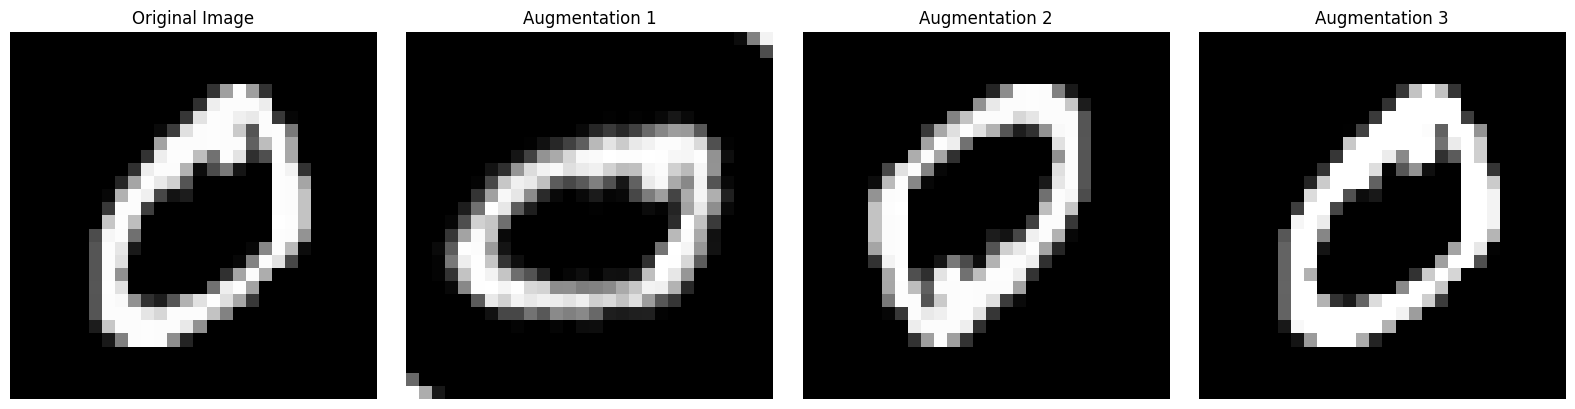

In [23]:
# we ll have 3 augmentations and for each image we'll aply some randon
augmentation = {
    '1': tf.keras.layers.RandomRotation(0.2),
    '2': tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    '3': tf.keras.layers.RandomContrast(0.6)
}

# Select a single image
img = train_images[1]

# Assuming the image is grayscale and needs to be reshaped for augmentation layers which expect a batch dimension
img = img.reshape(1, 28, 28, 1)

# Setup the plot
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # 1 row, 4 columns
axes[0].imshow(img[0, :, :, 0], cmap='gray')
axes[0].title.set_text('Original Image')
axes[0].axis('off')

# Apply each augmentation and plot
for i, key in enumerate(augmentation, start=1):
    augmented_img = augmentation[key](img, training=True)  # Apply augmentation
    axes[i].imshow(augmented_img[0, :, :, 0], cmap='gray')  # Assumes image is grayscale
    axes[i].title.set_text(f'Augmentation {key}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [24]:
import numpy as np
# Prepare empty lists to hold augmented images and their labels
augmented_images = []
augmented_labels = []

# Iterate through each image and its label in the training set
for img, label in zip(train_images, train_labels):
    img = img.reshape(1, 28, 28, 1)  # Reshape image to include batch dimension

    # Choose a random augmentation
    random_aug_key = np.random.choice(list(augmentation.keys()))
    aug_layer = augmentation[random_aug_key]

    # Apply the chosen augmentation
    augmented_img = aug_layer(img, training=True)

    # Store the augmented image and label
    augmented_images.append(augmented_img[0, :, :, 0])  # Remove batch dimension
    augmented_labels.append(label)

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Combine original and augmented datasets
combined_images = np.concatenate([train_images, augmented_images], axis=0)
combined_labels = np.concatenate([train_labels, augmented_labels], axis=0)

In [25]:
#updated size
combined_images.shape

(120000, 28, 28)

After augmentation the number fo trainable images has doubled

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1,)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(combined_images, combined_labels, epochs=5, batch_size=64, validation_data=(test_images,test_labels))


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9519 - accuracy: 0.8567 - val_loss: 0.1616 - val_accuracy: 0.9490
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3032 - accuracy: 0.9123 - val_loss: 0.1463 - val_accuracy: 0.9592
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2691 - accuracy: 0.9222 - val_loss: 0.1802 - val_accuracy: 0.9477
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2511 - accuracy: 0.9268 - val_loss: 0.1704 - val_accuracy: 0.9495
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2371 - accuracy: 0.9307 - val_loss: 0.1681 - val_accuracy: 0.9530


By using data augmentation on the image we were able to reduce the overfitting and bring out the difference between train accuracy and validation accuracy.